In [1]:
import numpy as np, random , math
from scipy.optimize import minimize 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(100)

classA = np.concatenate((
    np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
    np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]
    ))
classB=np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs=np.concatenate((classA, classB))
targets=np.concatenate(
    (np.ones(classA.shape[0]), 
     -np.ones(classB.shape[0])))

N = inputs.shape[0] # Number of rows (samples)

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute,:]
targets = targets[permute]

In [3]:
def linear_kernel(x, y):
    """Takes two data points as arguments and returns a “scalar product-like” similarity measure; a scalar value."""
    return np.dot(np.transpose(x),y)  

In [4]:
def polynomial_kernel(x, y):
    return math.pow((np.dot(np.transpose(x),y)+1), 3)

In [5]:
#ToDo: check linear algebra expression
def radial_basis_function_kernel(x,y):
    return math.exp(-math.pow(np.linalg.norm(np.subtract(x, y)), 2)/(2*math.pow(4,2))) 

In [6]:
pre_compute_matrix = np.zeros((N,N))
kernel = radial_basis_function_kernel
for i in range(N):
    for j in range(N):
        pre_compute_matrix[i][j] = targets[i]*targets[j]*kernel(inputs[i], inputs[j])     

In [7]:
def objective(alpha):
    result = 1/2*np.dot(alpha, np.dot(alpha, pre_compute_matrix))-np.sum(alpha)
    return result

In [8]:
def zerofun(alpha):
    return np.sum(np.dot(alpha, targets))

In [9]:
C=10000
start = np.zeros(N)
B=[(0, C) for b in range(N)]
#bounds=[(0, None) for b in range(N)]
XC={'type':'eq', 'fun':zerofun}

In [10]:
ret = minimize(objective, start,
                bounds = B, constraints = XC)
if(ret['success']):
    alpha = ret['x']   

In [11]:
nonzero = [(alpha[i], inputs[i], targets[i]) 
           for i in range(N) if abs(alpha[i]) > 10e-5]
nonzero

[(118.97818915377259, array([-0.3227157 , -0.20585723]), -1.0),
 (78.78560249947773, array([-1.26207555,  0.16187663]), 1.0),
 (40.19258665429449, array([1.41237288, 0.27633635]), 1.0)]

In [12]:
#def bval(x,y):
#    b = 0
#    for alpha, inputs, targets in nonzero:
#        b += np.dot(kernel(x,y), np.dot(alpha, targets))-nonzeros[[x,y]]
#    return b


def bval():
    support_vector = nonzero[0][1]
    t_support = nonzero[0][2]
    bsum = 0
    for val in nonzero:
        bsum += val[0] * val[2] * kernel(support_vector, val[1])
    return bsum - t_support


In [13]:
#def indicator(x,y):
#    total_sum = 0
#    for alpha, inputs, targets in nonzero:
#        total_sum += np.dot(kernel(x,y), np.dot(alpha, targets)
#    return total_sum - bval(x,y)

def indicator(x, y):
    totsum = 0
    for val in nonzero:
        totsum += val[0] * val[2] * kernel([x, y], val[1])
    return totsum - bval()

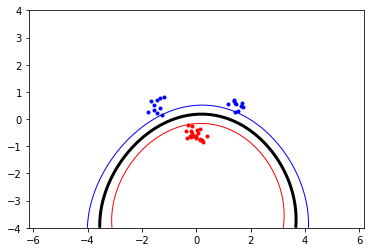

In [14]:
%matplotlib inline

plt.plot([p[0] for p in classA],
        [p[1] for p in classA],
        'b.')
plt.plot([p[0] for p in classB],
        [p[1] for p in classB],
        'r.')

xgrid=np.linspace(-5, 5)
ygrid=np.linspace(-4, 4)

grid=np.array([[indicator(x,y)
                   for x in xgrid ]
                  for y in ygrid])

plt.contour(xgrid, ygrid, grid,
             (-1.0, 0.0, 1.0),
             colors=("red", "black", "blue"),
             linewidths=(1, 3, 1))

plt.axis("equal") # Force same scale on both axes
plt.savefig("svmplot.pdf") # Save a copy in a file
plt.show() # Show the plot on the screen